# Importando pacotes e módulos

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor

# Declarando constantes

In [2]:
SEED = 42 # semente aleatória

# Carregando e salvando o arquivo de dados

In [13]:
df = pd.read_csv('full_limpo.csv')

df["garages"] = df['garages'].astype(int)
df["price"] = df['price'].astype(float)

df['finalprice'] = df['price'] + df['condo']

In [14]:
# Retirando colunas desnecessárias

df = df.drop(columns=['id'])
df = df.drop(columns=['url'])
df = df.drop(columns=['header'])
df = df.drop(columns=['address'])
df = df.drop(columns=['amenities'])
df = df.drop(columns=['crawler'])
df = df.drop(columns=['crawled_at'])
df = df.drop(columns=['condo'])
df = df.drop(columns=['price'])

In [15]:
print(df)

     area  rooms  bathrooms  garages            neighborhood  finalprice
0      49      1          2        1                  Centro      1533.0
1      75      2          2        1   Mansões Santo Antônio      3200.0
2     103      3          3        2              Swiss Park      4500.0
3      72      2          1        1          Jardim Proença      1400.0
4      70      2          2        2                      SP      3769.0
..    ...    ...        ...      ...                     ...         ...
171    61      1          1        1                      SP      1800.0
172    42      1          1        1            Vila Itapura      2850.0
173   162      3          5        3            Parque Prado     11050.0
174    78      2          2        0                  Centro      1740.0
175    51      1          2        1                  Cambuí      3446.0

[176 rows x 6 columns]


# Dividindo o arquivo entre X (dados que colocaremos no modelo) e y (dados que vamos prever)

In [16]:
X = df.drop('finalprice', axis=1)
y = df['finalprice']

In [17]:
X.head()

,area,rooms,bathrooms,garages,neighborhood
0,49,1,2,1,Centro
1,75,2,2,1,Mansões Santo Antônio
2,103,3,3,2,Swiss Park
3,72,2,1,1,Jardim Proença
4,70,2,2,2,SP


In [18]:
y.head()

0    1533.0
1    3200.0
2    4500.0
3    1400.0
4    3769.0
Name: finalprice, dtype: float64

## Fazendo o one hot encoding das variáveis catgóricas de Zona

In [19]:
X['neighborhood'].unique()

array([' Centro', ' Mansões Santo Antônio', ' Swiss Park',
       ' Jardim Proença', ' SP', ' Cambuí', ' Chácara da Barra', ' Swift',
       ' Parque Dom Pedro II', ' Guanabara', ' Bonfim', ' Vila Itapura',
       ' Chácara Primavera', ' Jardim Nova Europa', ' Vila Marieta',
       ' Recanto do Sol I', ' Vila Padre Manoel de Nóbrega',
       ' Jardim Márcia', ' Bosque', ' Parque Itália', ' Vila João Jorge',
       ' Jardim Von Zuben', ' Parque Prado', ' Jardim Guarani',
       ' Vila Estanislau', ' Botafogo', ' Jardim das Bandeiras',
       ' Fazenda São Quirino', ' Vila Industrial', ' Jardim Madalena',
       ' Parque das Universidades', ' São Bernardo', ' Jardim Florence',
       ' Fazenda Santa Cândida', ' Jardim Flamboyant', ' Ponte Preta',
       ' Jardim Antonio Von Zuben', ' Taquaral', ' Jardim Paulistano',
       ' Jardim Leonor', ' Loteamento Country Ville', ' Jardim Chapadão',
       ' Jardim São Gabriel', ' Parque Brasília', ' Parque Industrial',
       ' Jardim do Lago II',

In [20]:
X = pd.get_dummies(X)

# Dividindo os dados entre treino e teste

In [21]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        train_size=0.8, 
                                                        random_state=SEED)

# Fazendo a transformação para log + 1 dos dados de treino

In [22]:
X_treino = np.log1p(X_treino)
y_treino = np.log1p(y_treino)

# Usando um modelo de base (baseline)

In [23]:
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_treino, y_treino)
y_pred_base = baseline.predict(np.log1p(X_teste))

In [24]:
print('O R² do modelo de base que sempre prevê a média é:', baseline.score(np.log1p(X_teste), np.log1p(y_teste)))

O R² do modelo de base que sempre prevê a média é: -0.11014263616568942


# Aplicando um modelo de Regressão Linear

In [25]:
reg = LinearRegression()
reg.fit(X_treino, y_treino)
y_pred = reg.predict(np.log1p(X_teste))

In [30]:
reg.score(np.log1p(X_teste), np.log1p(y_teste)) 

-4.2089587209352826e+23

In [31]:
reg.coef_

array([ 5.72251419e-01, -1.47054825e-01,  2.69952777e-01,  6.26859089e-01,
        4.97511823e+12, -2.74680809e+11, -2.74680809e+11, -2.74680809e+11,
       -2.74680809e+11, -1.79126583e+11, -2.74680809e+11, -2.74680809e+11,
        1.51932452e+11, -3.63631938e+10, -2.74680809e+11, -2.74680809e+11,
       -2.74680809e+11, -2.74680809e+11, -2.74680809e+11, -2.74680809e+11,
       -2.74680809e+11, -6.16953499e+03, -2.74680809e+11, -2.74680809e+11,
       -2.74680809e+11,  1.66533454e-16,  3.05311332e-16, -2.74680809e+11,
       -2.74680809e+11, -2.74680809e+11, -2.74680809e+11, -2.74680809e+11,
        3.33066907e-16, -1.73472348e-16, -2.74680809e+11, -2.74680809e+11,
       -2.74680809e+11, -2.74680809e+11, -2.74680809e+11, -2.74680809e+11,
       -2.74680809e+11, -2.74680809e+11, -2.74680809e+11, -2.74680809e+11,
       -2.74680809e+11, -2.74680809e+11, -2.74680809e+11, -2.74680809e+11,
       -2.74680809e+11,  0.00000000e+00, -2.74680809e+11, -2.74680809e+11])

In [32]:
reg.intercept_

190452513806.78598

In [33]:
r2_score(np.log1p(y_teste), y_pred)

-4.2089587209352826e+23

# Calculando medidas de erro para o modelo de regressão: MAE, MSE, RMSE

In [34]:
mean_absolute_error(np.log1p(y_teste), y_pred) # MAE

152790401252.81296

In [35]:
mean_squared_error(np.log1p(y_teste), y_pred) # MSE

3.784076437683026e+23

In [36]:
mean_squared_error(np.log1p(y_teste), y_pred, squared=False) # RMSE

615148472946.412

# Aplicando um modelo de KNN (K vizinhos mais próximos)

In [37]:
knn = KNeighborsRegressor()

In [38]:
knn # hiperparâmetros

KNeighborsRegressor()

In [39]:
knn.fit(X_treino, y_treino)

KNeighborsRegressor()

In [40]:
y_pred_knn = knn.predict(np.log1p(X_teste))

## Comparando as métricas entre KNN e Regressão Linear

In [41]:
print('Métricas do KNN com 5 vizinhos')
print('O R² foi:' , knn.score(np.log1p(X_teste), np.log1p(y_teste)))
print('O MAE foi:' , mean_absolute_error(np.log1p(y_teste), y_pred_knn))
print('O MSE foi:' , mean_squared_error(np.log1p(y_teste), y_pred_knn))

Métricas do KNN com 5 vizinhos
O R² foi: 0.4850909898889967
O MAE foi: 0.39603211531561905
O MSE foi: 0.46293042576544163


In [42]:
print('Métricas da Regressão Linear')
print('O R² foi:' , reg.score(np.log1p(X_teste), np.log1p(y_teste)))
print('O MAE foi:' , mean_absolute_error(np.log1p(y_teste), y_pred))
print('O MSE foi:' , mean_squared_error(np.log1p(y_teste), y_pred))

Métricas da Regressão Linear
O R² foi: -4.2089587209352826e+23
O MAE foi: 152790401252.81296
O MSE foi: 3.784076437683026e+23


# Aplicando um modelo de Árvore de Decisão

In [43]:
dt = DecisionTreeRegressor(max_depth=3,)
dt.fit(X_treino, y_treino)
y_pred_dt = dt.predict(np.log1p(X_teste))

## Visualizando a Árvore de Decisão

In [44]:
X_treino.columns

Index(['area', 'rooms', 'bathrooms', 'garages', 'neighborhood_ Bonfim',
       'neighborhood_ Bosque', 'neighborhood_ Botafogo',
       'neighborhood_ Cambuí', 'neighborhood_ Centro',
       'neighborhood_ Chácara Primavera', 'neighborhood_ Chácara da Barra',
       'neighborhood_ Fazenda Santa Cândida',
       'neighborhood_ Fazenda São Quirino', 'neighborhood_ Guanabara',
       'neighborhood_ Jardim Antonio Von Zuben',
       'neighborhood_ Jardim Chapadão', 'neighborhood_ Jardim Flamboyant',
       'neighborhood_ Jardim Florence', 'neighborhood_ Jardim Guarani',
       'neighborhood_ Jardim Leonor', 'neighborhood_ Jardim Madalena',
       'neighborhood_ Jardim Márcia', 'neighborhood_ Jardim Nova Europa',
       'neighborhood_ Jardim Paulistano', 'neighborhood_ Jardim Proença',
       'neighborhood_ Jardim São Gabriel', 'neighborhood_ Jardim Von Zuben',
       'neighborhood_ Jardim das Bandeiras', 'neighborhood_ Jardim do Lago II',
       'neighborhood_ Loteamento Country Ville',
  

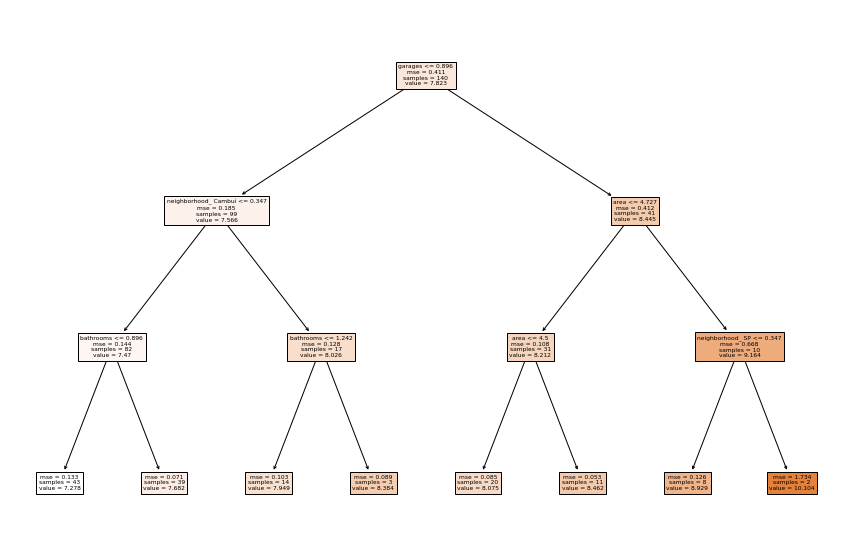

In [45]:
plt.figure(figsize=(15, 10))

plot_tree(dt, feature_names=X_treino.columns, filled=True);

In [46]:
for feature in zip(X_treino.columns, dt.feature_importances_):
  print(feature)
  print('---')

('area', 0.19472874055427847)
---
('rooms', 0.0)
---
('bathrooms', 0.09330757842936749)
---
('garages', 0.5507176895746853)
---
('neighborhood_ Bonfim', 0.0)
---
('neighborhood_ Bosque', 0.0)
---
('neighborhood_ Botafogo', 0.0)
---
('neighborhood_ Cambuí', 0.10695300452772626)
---
('neighborhood_ Centro', 0.0)
---
('neighborhood_ Chácara Primavera', 0.0)
---
('neighborhood_ Chácara da Barra', 0.0)
---
('neighborhood_ Fazenda Santa Cândida', 0.0)
---
('neighborhood_ Fazenda São Quirino', 0.0)
---
('neighborhood_ Guanabara', 0.0)
---
('neighborhood_ Jardim Antonio Von Zuben', 0.0)
---
('neighborhood_ Jardim Chapadão', 0.0)
---
('neighborhood_ Jardim Flamboyant', 0.0)
---
('neighborhood_ Jardim Florence', 0.0)
---
('neighborhood_ Jardim Guarani', 0.0)
---
('neighborhood_ Jardim Leonor', 0.0)
---
('neighborhood_ Jardim Madalena', 0.0)
---
('neighborhood_ Jardim Márcia', 0.0)
---
('neighborhood_ Jardim Nova Europa', 0.0)
---
('neighborhood_ Jardim Paulistano', 0.0)
---
('neighborhood_ Jardi

In [47]:
dt.score(np.log1p(X_teste), np.log1p(y_teste))

0.6592993647520573

In [48]:
print('Métricas da Árvore de Decisão')
print('O R² foi:' , dt.score(np.log1p(X_teste), np.log1p(y_teste)))
print('O MAE foi:' , mean_absolute_error(np.log1p(y_teste), y_pred_dt))
print('O MSE foi:' , mean_squared_error(np.log1p(y_teste), y_pred_dt))

Métricas da Árvore de Decisão
O R² foi: 0.6592993647520573
O MAE foi: 0.3816460683763838
O MSE foi: 0.3063078855425065


In [49]:
print('Métricas da Árvore de Decisão')
print('O R² foi:' , dt.score(X_treino, y_treino))

Métricas da Árvore de Decisão
O R² foi: 0.7061481372079144


# Aplicando o modelo Random Forest Regressor nos dados

In [50]:
rfr = RandomForestRegressor(random_state=SEED)

# Usando o score de validação cruzada para escolher um modelo

In [51]:
cv_base = cross_val_score(baseline, X_treino, y_treino)
cv_reg = cross_val_score(reg, X_treino, y_treino)
cv_knn = cross_val_score(knn, X_treino, y_treino)
cv_dt = cross_val_score(dt, X_treino, y_treino)
cv_rfr = cross_val_score(rfr, X_treino, y_treino)

In [52]:
cv_base

array([-0.00018547, -0.0006847 , -0.0254055 , -0.0867561 , -0.04405446])

In [53]:
cvs = [cv_base, cv_reg, cv_knn, cv_dt, cv_rfr]

for cv, pontuacoes in enumerate(cvs):
  print(f'{cv}: {np.mean(pontuacoes):.2f}')

0: -0.03
1: -595278138860095328485376.00
2: 0.48
3: -1.06
4: 0.47


## Usando a busca em grade com validação cruzada (Grid Search CV) para o Random Forest Regressor

In [54]:
parametros = {'max_depth': [5, 10, 30, 20],
              'n_estimators': [100, 200, 150, 110]}

In [55]:
gs = GridSearchCV(rfr, parametros, cv=5, scoring='r2', verbose=2)

In [56]:
gs.fit(X_treino, y_treino)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ......................max_depth=5, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 30, 20],
                         'n_estimators': [100, 200, 150, 110]},
             scoring='r2', verbose=2)

In [57]:
gs.best_score_

0.4906927473087256

In [58]:
gs.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=42)

In [59]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [60]:
resultados_gs = pd.DataFrame(gs.cv_results_)

In [61]:
resultados_gs.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.131287,0.001285,0.010184,0.000181,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.672132,0.759071,0.661485,-0.070269,0.431045,0.490693,0.300783,1
0,0.090552,0.002955,0.007489,0.000305,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.663378,0.747738,0.656871,-0.082304,0.429861,0.483109,0.301744,2
3,0.097588,0.002355,0.008400,0.000466,5,110,"{'max_depth': 5, 'n_estimators': 110}",0.666121,0.750933,0.653877,-0.116162,0.434943,0.477942,0.314864,3
4,0.098473,0.002672,0.008123,0.000352,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.700117,0.776052,0.615311,-0.130991,0.423701,0.476838,0.325833,4
6,0.142479,0.004043,0.010650,0.000373,10,150,"{'max_depth': 10, 'n_estimators': 150}",0.706296,0.788337,0.627437,-0.174294,0.427740,0.475103,0.346044,5


In [62]:
rfr_tunado = RandomForestRegressor(max_depth=5, 
                                   n_estimators=200, 
                                   random_state=SEED)

In [63]:
rfr_tunado.fit(X_treino, y_treino)
y_pred_rfr_tunado = rfr_tunado.predict(X_teste)
print('O R² final do Random Forest após a busca de hiperparâmetros e a validação cruzada é:', rfr_tunado.score(np.log1p(X_teste), np.log1p(y_teste)))

O R² final do Random Forest após a busca de hiperparâmetros e a validação cruzada é: 0.6559533110067344


# Salvando o modelo

In [64]:
import pickle

In [65]:
# para criar o arquivo do pickle, .pkl, fazemos um pickle.dump
# passando o nome do modelo que queremos salvar, o nome do arquivo dentro de open
# e a escrita em binário com wb (write binary)
pickle.dump(rfr_tunado, open('modelo_rfr.pkl', 'wb'))

In [66]:
modelo_final = pickle.load(open('modelo_rfr.pkl', 'rb'))

In [67]:
modelo_final.score(np.log1p(X_teste), np.log1p(y_teste))

0.6559533110067344

In [ ]:
# # depois de 5 anos se precisarmos recalibrar o modelo
# modelo = pickle.load(open('modelo_rfr_tunado.pkl', 'rb'))
# modelo.fit(X_treino, y_treino)
# gs_pos_5_anos = GridSearchCV(modelo, parametros)
# gs_pos_5_anos.best_estimator_